<p style="text-align: center;">
  <img src="logo_OCR.jpg" alt="Logo Academy" width="100">
</p>
<h1 style="text-align: center;">Projet d’analyse exploratoire</h1>

# Contexte

Je suis __Data Scientist__ au sein de la start-up *academy*, qui propose des contenus de formation en ligne pour un public allant du lycée à l’université.

Mon manager, Mark, m’a présenté le projet d’expansion internationale de l’entreprise. Il m’a confié une première mission d’analyse exploratoire : déterminer si les données éducatives de la Banque Mondiale peuvent aider à orienter les choix stratégiques d’implantation à l’étranger. [Voici le lien vers le jeu de données. ](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Donn%C3%A9es+%C3%A9ducatives/Projet+Python_Dataset_Edstats_csv.zip)

[(issu du site de la Banque Mondiale). ](https://datacatalog.worldbank.org/dataset/education-statistics)



🎯 __Mon objectif__ : identifier les pays présentant un fort potentiel pour les services proposés par academy, et anticiper l’évolution de ce potentiel dans le temps.

Je vais pour cela suivre un ensemble d’exercices guidés, qui me permettront de valider si ces jeux de données fournissent des insights pertinents pour appuyer la prise de décision.

Ce premier exercice consiste à explorer les jeux de données en surface, afin d’en dégager une première compréhension.


<h1 style="text-align: center;">Partie n°1 : charger, collecter et réaliser le 1er nettoyage</h1>

## Etape 1 : Chargez les données dans le Notebook

### 1.Importation des bibliothèques

In [57]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('default')

### 2.Chargement des données 

In [58]:
# Chargement des données
chemin_donnees = "Projet+Python_Dataset_Edstats_csv/"

# Chargement des différents fichiers
df_country = pd.read_csv(chemin_donnees + "EdStatsCountry.csv")
df_series = pd.read_csv(chemin_donnees + "EdStatsSeries.csv")
df_country_series = pd.read_csv(chemin_donnees + "EdStatsCountry-Series.csv")
df_footnote = pd.read_csv(chemin_donnees + "EdStatsFootNote.csv")
df_data = pd.read_csv(chemin_donnees + "EdStatsData.csv")

### 3.Visualisation des premières lignes

### EdStatsCountry.csv = df_country

In [59]:
print("df_country")
display(df_country.head())

# Afficher le nombre de lignes et de colonnes
print("Nombre de lignes et de colonnes :", df_country.shape)

df_country


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


Nombre de lignes et de colonnes : (241, 32)


### EdStatsSeries.csv = df_series

In [60]:
print("df_series")
display(df_series.head())

# Affichage des premières lignes et dimensions pour chaque DataFrame
print("Nombre de lignes et de colonnes :", df_series.shape)

df_series


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nombre de lignes et de colonnes : (3665, 21)


### EdStatsCountry-Series.csv = df_country_series

In [61]:
print("df_country_series")
display(df_country_series.head())

# Afficher le nombre de lignes et de colonnes
print("Nombre de lignes et de colonnes :", df_country_series.shape)

df_country_series


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


Nombre de lignes et de colonnes : (613, 4)


### EdStatsFootNote.csv = df_footnote

In [62]:
print("df_footnote")
display(df_footnote.head())

# Afficher le nombre de lignes et de colonnes
print("Nombre de lignes et de colonnes :", df_footnote.shape)

df_footnote


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


Nombre de lignes et de colonnes : (643638, 5)


### EdStatsData.csv = df_data

In [63]:
print("df_data")
display(df_data.head())

# Afficher le nombre de lignes et de colonnes
print("Nombre de lignes et de colonnes :", df_data.shape)

df_data


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nombre de lignes et de colonnes : (886930, 70)


### 4. Taille des jeux de données (Récapitulatif)

In [64]:
print("Taille de df_country :", df_country.shape)
print("Taille de df_series :", df_series.shape)
print("Taille de df_country_series :", df_country_series.shape)
print("Taille de df_footnote :", df_footnote.shape)
print("Taille de df_data :", df_data.shape)

Taille de df_country : (241, 32)
Taille de df_series : (3665, 21)
Taille de df_country_series : (613, 4)
Taille de df_footnote : (643638, 5)
Taille de df_data : (886930, 70)


## Etape 2 : Collectez des informations basiques sur chaque jeu de données

# 1.1 Analyse du fichier EdStatsCountry.csv

## Ce que représente une ligne
Une ligne = un pays avec ses caractéristiques et métadonnées (code, nom, région, groupe de revenu, etc.)

In [65]:
# 1. Afficher les premières lignes
display(df_country.head())

# 2. Nombre de lignes et de colonnes
print("Nombre de lignes et de colonnes :", df_country.shape)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


Nombre de lignes et de colonnes : (241, 32)


In [66]:
# 3. Nombre de doublons
print("Nombre de doublons :", df_country.duplicated().sum())

# 4. Suppression des doublons (si besoin)
df_country = df_country.drop_duplicates()

Nombre de doublons : 0


## On supprime les colonnes avec plus de 70% de valeurs manquantes

In [67]:
# 5. Proportion de valeurs manquantes par colonne
print("Proportion de valeurs manquantes par colonne :")
print(df_country.isnull().mean().sort_values(ascending=False))

# 6. Suppression des colonnes inutilisables (exemple : toutes les valeurs manquantes)
seuil = 0.7  # On supprime les colonnes avec plus de 70% de valeurs manquantes
colonnes_a_supprimer = df_country.columns[df_country.isnull().mean() > seuil]
print("Colonnes supprimées :", list(colonnes_a_supprimer))
df_country = df_country.drop(columns=colonnes_a_supprimer)

print("Nombre de lignes et de colonnes après la suppression des colonnes inutilisables :", df_country.shape)

Proportion de valeurs manquantes par colonne :
Unnamed: 31                                          1.000000
National accounts reference year                     0.867220
Alternative conversion factor                        0.804979
Other groups                                         0.759336
Latest industrial data                               0.556017
Vital registration complete                          0.539419
External debt Reporting status                       0.485477
Latest household survey                              0.414938
Latest agricultural census                           0.410788
Lending category                                     0.402490
PPP survey year                                      0.398340
Special Notes                                        0.398340
Source of most recent Income and expenditure data    0.336100
Government Accounting concept                        0.331950
Latest water withdrawal data                         0.257261
Balance of Payments Man

### Colonnes supprimées : ['National accounts reference year', 'Other groups', 'Alternative conversion factor', 'Unnamed: 31']
### On passe de (241, 32) lignes et colonnes à (241, 28).

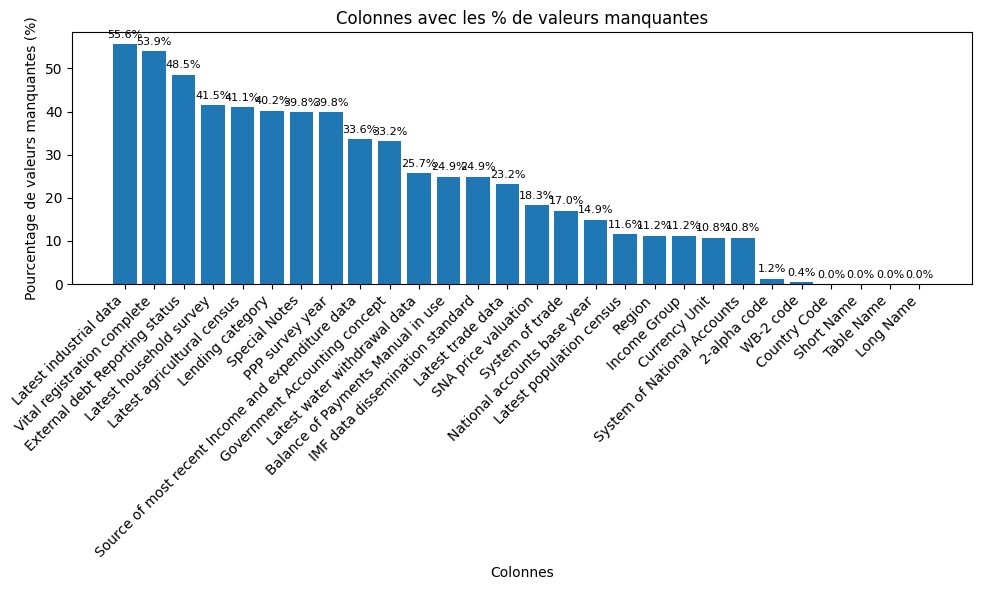

In [68]:
# Calcul du pourcentage de valeurs manquantes
missing = df_country.isnull().mean() * 100
# Trier les valeurs par ordre décroissant
missing = missing.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(missing.index, missing.values)
plt.title("Colonnes avec les % de valeurs manquantes")
plt.ylabel("Pourcentage de valeurs manquantes (%)")
plt.xlabel("Colonnes")
plt.xticks(rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

In [69]:
# Pour les colonnes numériques
print("Statistiques descriptives des colonnes numériques :")
print("")
print(df_country.describe())

Statistiques descriptives des colonnes numériques :

       Latest industrial data  Latest trade data
count              107.000000         185.000000
mean              2008.102804        2010.994595
std                  2.616834           2.569675
min               2000.000000        1995.000000
25%               2007.500000        2011.000000
50%               2009.000000        2012.000000
75%               2010.000000        2012.000000
max               2010.000000        2012.000000


- Toutes les colonnes restantes (`CountryCode`, `SeriesCode`, `DESCRIPTION`) sont complètes : **0% de valeurs manquantes**.
- Aucune colonne n'a été supprimée.
- Taille du dataset après nettoyage : **613 lignes et 3 colonnes**.

## Pour les données industrielles et commerciales (colonne numériques):

1. **Données industrielles (Latest industrial data)** :
   - Sur 107 pays, les données industrielles les plus récentes datent en moyenne de 2008
   - La médiane (50%) est de 2009, ce qui signifie que la moitié des pays ont des données de 2009 ou plus récentes
   - Les données s'étendent de 2000 à 2010, avec une dispersion faible (écart-type de 2.6 années)
   - 75% des pays ont des données de 2010 ou plus récentes

2. **Données commerciales (Latest trade data)** :
   - Sur 185 pays, les données commerciales les plus récentes datent en moyenne de 2011
   - La médiane est de 2012, indiquant que la moitié des pays ont des données de 2012
   - Les données s'étendent de 1995 à 2012, avec une dispersion similaire (écart-type de 2.6 années)
   - 75% des pays ont des données de 2012

En résumé, les données commerciales sont globalement plus récentes que les données industrielles, avec une couverture plus large (185 pays contre 107). Les deux ensembles de données montrent une faible dispersion, suggérant une relative homogénéité dans la fraîcheur des données par pays.

In [70]:
# Pour les colonnes catégorielles
print("\nAnalyse des colonnes catégorielles :")

# Identifier les colonnes catégorielles
colonnes_categorielles = df_country.select_dtypes(include=['object']).columns

# Afficher le nombre d'occurrences pour chaque colonne catégorielle
for colonne in colonnes_categorielles:
    print(f"\nDistribution des valeurs pour la colonne '{colonne}':")
    print(df_country[colonne].value_counts())
    print("\n" + "-"*30)


Analyse des colonnes catégorielles :

Distribution des valeurs pour la colonne 'Country Code':
Country Code
ABW    1
AFG    1
AGO    1
ALB    1
AND    1
      ..
XKX    1
YEM    1
ZAF    1
ZMB    1
ZWE    1
Name: count, Length: 241, dtype: int64

------------------------------

Distribution des valeurs pour la colonne 'Short Name':
Short Name
Aruba           1
Afghanistan     1
Angola          1
Albania         1
Andorra         1
               ..
Kosovo          1
Yemen           1
South Africa    1
Zambia          1
Zimbabwe        1
Name: count, Length: 241, dtype: int64

------------------------------

Distribution des valeurs pour la colonne 'Table Name':
Table Name
Aruba           1
Afghanistan     1
Angola          1
Albania         1
Andorra         1
               ..
Kosovo          1
Yemen, Rep.     1
South Africa    1
Zambia          1
Zimbabwe        1
Name: count, Length: 241, dtype: int64

------------------------------

Distribution des valeurs pour la colonne 'Long N

## Colonnes Principales (colonnes catégorielles)
Le DataFrame contient les informations suivantes pour chaque pays :
- Code pays unique
- Nom court du pays
- Nom complet du pays
- Région géographique
- Groupe de revenu
- Devise nationale
- Autres métadonnées spécifiques au pays

# 1.2 Analyse du fichier EdStatsSeries.csv


- **Ce que représente une ligne** : une ligne = pour définir les indicateurs

In [71]:
# 1. Afficher les premières lignes
display(df_series.head())

# 2. Nombre de lignes et de colonnes
print("Nombre de lignes et de colonnes :", df_series.shape)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nombre de lignes et de colonnes : (3665, 21)


In [72]:
# 3. Nombre de doublons
print("Nombre de doublons :", df_series.duplicated().sum())

# 4. Suppression des doublons (si besoin)
df_series = df_series.drop_duplicates()

Nombre de doublons : 0


## On supprime les colonnes avec plus de 70% de valeurs manquantes

In [73]:
# Pour df_series
print("Proportion de valeurs manquantes par colonne :")
print(df_series.isnull().mean().sort_values(ascending=False))

seuil = 0.7  # On supprime les colonnes avec plus de 70% de valeurs manquantes
colonnes_a_supprimer = df_series.columns[df_series.isnull().mean() > seuil]
print("Colonnes supprimées :", list(colonnes_a_supprimer))
df_series = df_series.drop(columns=colonnes_a_supprimer)

print("Nombre de lignes et de colonnes après la suppression des colonnes inutilisables :", df_series.shape)

Proportion de valeurs manquantes par colonne :
Other web links                        1.000000
Unnamed: 20                            1.000000
License Type                           1.000000
Notes from original source             1.000000
Unit of measure                        1.000000
Related indicators                     1.000000
Development relevance                  0.999181
General comments                       0.996180
Limitations and exceptions             0.996180
Statistical concept and methodology    0.993724
Aggregation method                     0.987176
Periodicity                            0.972988
Related source links                   0.941337
Base Period                            0.914325
Other notes                            0.849386
Short definition                       0.411733
Series Code                            0.000000
Long definition                        0.000000
Indicator Name                         0.000000
Topic                                  0.

### On passe de (3665, 21) lignes et colonnes à (3665, 6).

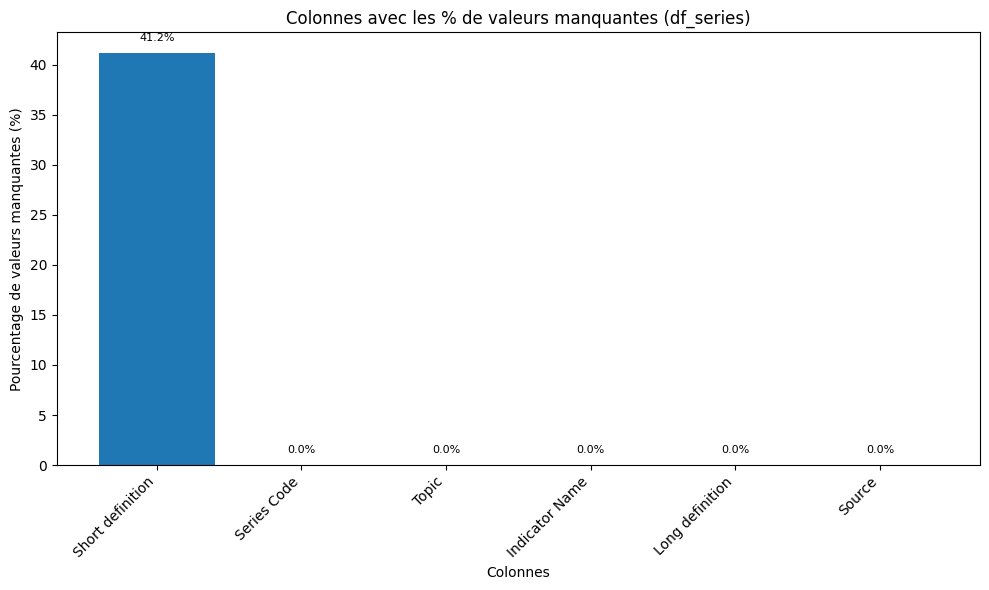

In [74]:
# Calcul du pourcentage de valeurs manquantes pour df_series
missing_series = df_series.isnull().mean() * 100

# Trier les valeurs par ordre décroissant
missing_series = missing_series.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars_series = plt.bar(missing_series.index, missing_series.values)
plt.title("Colonnes avec les % de valeurs manquantes (df_series)")
plt.ylabel("Pourcentage de valeurs manquantes (%)")
plt.xlabel("Colonnes")
plt.xticks(rotation=45, ha='right')

# Annoter les barres avec les valeurs
for bar in bars_series:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


In [75]:
# Statistiques descriptives pour df_series
print("Statistiques descriptives des colonnes numériques de df_series :")
print("")
print(df_series.describe())


Statistiques descriptives des colonnes numériques de df_series :

                        Series Code              Topic  \
count                          3665               3665   
unique                         3665                 37   
top     XGDP.56.FSGOV.FDINSTADM.FFD  Learning Outcomes   
freq                              1               1046   

                                           Indicator Name  \
count                                                3665   
unique                                               3665   
top     Government expenditure in tertiary institution...   
freq                                                    1   

                                         Short definition  \
count                                                2156   
unique                                               1169   
top     Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
freq                                                  215   

                               

## Analyse rapide des statistiques descriptives de `df_series`

Le dataset `df_series` contient principalement des colonnes textuelles (type `object`), comme :

- `Series Code`
- `Topic`
- `Indicator Name`
- `Short definition`
- `Long definition`
- `Source`

Lorsque j'exécute `df_series.describe()`, pandas me retourne donc des statistiques adaptées aux colonnes textuelles :
- `count` : nombre total de valeurs non nulles
- `unique` : nombre de valeurs uniques
- `top` : valeur la plus fréquente
- `freq` : fréquence de la valeur la plus fréquente

Il n'y a pas de colonnes numériques détectées automatiquement dans ce dataframe. Les statistiques classiques (`mean`, `std`, etc.) ne sont donc pas calculées ici.


In [76]:
# Pour les colonnes catégorielles de df_series
print("\nAnalyse des colonnes catégorielles de df_series :")

# Identifier les colonnes catégorielles
colonnes_categorielles_series = df_series.select_dtypes(include=['object']).columns

# Afficher le nombre d'occurrences pour chaque colonne catégorielle
for colonne in colonnes_categorielles_series:
    print(f"\nDistribution des valeurs pour la colonne '{colonne}':")
    print(df_series[colonne].value_counts())
    print("\n" + "-"*30)



Analyse des colonnes catégorielles de df_series :

Distribution des valeurs pour la colonne 'Series Code':
Series Code
XGDP.56.FSGOV.FDINSTADM.FFD    1
UIS.XUNIT.PPPCONST.3.FSGOV     1
UIS.XUNIT.PPPCONST.23.FSGOV    1
UIS.XUNIT.PPPCONST.2.FSGOV     1
UIS.XUNIT.PPPCONST.1.FSGOV     1
                              ..
BAR.NOED.2024.ZS               1
BAR.NOED.2024.FE.ZS            1
BAR.NOED.15UP.ZS               1
BAR.NOED.15UP.FE.ZS            1
BAR.NOED.1519.ZS               1
Name: count, Length: 3665, dtype: int64

------------------------------

Distribution des valeurs pour la colonne 'Topic':
Topic
Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                            

##  Analyse exploratoire du dataset `df_series`

- Nombre de lignes et de colonnes avant nettoyage : **3665 lignes, 21 colonnes**.
- Aucun doublon détecté.
- Très forte proportion de valeurs manquantes sur de nombreuses colonnes descriptives (plusieurs colonnes avec 100% de valeurs manquantes).
- Les colonnes non exploitables (avec 100% ou quasi 100% de valeurs manquantes) ont été supprimées.
- Nombre de colonnes après nettoyage : **6 colonnes conservées**.

### Colonnes principales conservées :
- `Series Code`
- `Topic`
- `Indicator Name`
- `Short definition`
- `Long definition`
- `Source`

### Statistiques descriptives (colonnes catégorielles) :
- `Series Code` : 3665 valeurs uniques (chaque série est unique).
- `Topic` : 37 thèmes différents. Les plus fréquents :
  - **Learning Outcomes** (1046 occurrences)
  - **Attainment** (733 occurrences)
  - **Education Equality** (426 occurrences)
- `Indicator Name` : 3665 indicateurs uniques.
- `Short definition` et `Long definition` contiennent des définitions plus ou moins longues des indicateurs.
- `Source` : 31 sources différentes. La plus fréquente :
  - **UNESCO Institute for Statistics** (1269 occurrences).

### 📝 Conclusion :
Le dataset `df_series` contient essentiellement des métadonnées sur les indicateurs disponibles (codes, définitions, sources). Il servira principalement à décrire et comprendre les indicateurs utilisés dans les autres datasets de données chiffrées.


## Pour df_country_series

# 1.3 Analyse du fichier EdStatsCountry-Series.csv

## Ce que représente une ligne
Une ligne contient essentiellement des liens entre pays et indicateurs démographiques, avec des descriptions précisant les sources ou les spécificités du calcul des indicateurs selon les pays.


In [77]:
# 1. Afficher les premières lignes de df_country_series
display(df_country_series.head())

# 2. Nombre de lignes et de colonnes de df_country_series
print("Nombre de lignes et de colonnes :", df_country_series.shape)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


Nombre de lignes et de colonnes : (613, 4)


In [78]:
# 3. Nombre de doublons
print("Nombre de doublons :", df_country_series.duplicated().sum())

# 4. Suppression des doublons (si besoin)
df_country_series = df_country_series.drop_duplicates()

Nombre de doublons : 0


## On supprime les colonnes avec plus de 70% de valeurs manquantes

In [79]:
# 5. Proportion de valeurs manquantes par colonne pour df_country_series
print("Proportion de valeurs manquantes par colonne :")
missing_country_series = df_country_series.isnull().mean().sort_values(ascending=False)
print(missing_country_series)

# 6. Suppression des colonnes inutilisables (exemple : toutes les valeurs manquantes)
seuil_country_series = 0.7  # On supprime les colonnes avec plus de 70% de valeurs manquantes
colonnes_a_supprimer_country_series = df_country_series.columns[df_country_series.isnull().mean() > seuil_country_series]
print("Colonnes supprimées :", list(colonnes_a_supprimer_country_series))
df_country_series = df_country_series.drop(columns=colonnes_a_supprimer_country_series)

print("Nombre de lignes et de colonnes après la suppression des colonnes inutilisables :", df_country_series.shape)


Proportion de valeurs manquantes par colonne :
Unnamed: 3     1.0
CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
dtype: float64
Colonnes supprimées : ['Unnamed: 3']
Nombre de lignes et de colonnes après la suppression des colonnes inutilisables : (613, 3)


- Toutes les colonnes restantes (`CountryCode`, `SeriesCode`, `DESCRIPTION`) sont complètes : **0% de valeurs manquantes**.
- Aucune colonne n'a été supprimée.
- Taille du dataset après nettoyage : **613 lignes et 3 colonnes**.

In [80]:
# Pour les colonnes numériques de df_country_series
print("Statistiques descriptives des colonnes numériques de df_country_series :")
print()
print(df_country_series.describe())


Statistiques descriptives des colonnes numériques de df_country_series :

       CountryCode   SeriesCode  \
count          613          613   
unique         211           21   
top            GEO  SP.POP.TOTL   
freq            18          211   

                                              DESCRIPTION  
count                                                 613  
unique                                                 97  
top     Data sources : United Nations World Population...  
freq                                                  154  


- `CountryCode` : 211 pays distincts, le plus fréquent : **GEO** (18 occurrences).
- `SeriesCode` : 21 indicateurs distincts, le plus fréquent : **SP.POP.TOTL** (211 occurrences).
- `DESCRIPTION` : 97 descriptions uniques, la plus fréquente apparaît 154 fois.

L'ensemble des colonnes sont de type catégoriel.

In [81]:
# Analyse des colonnes catégorielles de df_country_series
print("\nAnalyse des colonnes catégorielles de df_country_series :")

# Identifier les colonnes catégorielles (type object)
colonnes_categorielles_country_series = df_country_series.select_dtypes(include=['object']).columns

# Afficher le nombre d'occurrences pour chaque valeur unique dans chaque colonne catégorielle
for colonne in colonnes_categorielles_country_series:
    print(f"\nDistribution des valeurs pour la colonne '{colonne}':")
    print(df_country_series[colonne].value_counts())
    print("\n" + "-"*30)



Analyse des colonnes catégorielles de df_country_series :

Distribution des valeurs pour la colonne 'CountryCode':
CountryCode
GEO    18
MDA    18
CYP    12
SRB    12
MUS    12
       ..
WSM     2
YEM     2
ZAF     2
ZMB     2
ZWE     2
Name: count, Length: 211, dtype: int64

------------------------------

Distribution des valeurs pour la colonne 'SeriesCode':
SeriesCode
SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.CD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.KD     14
NY.GDP.MKTP.PP.CD     14
SP.POP.1564.TO.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.TOTL.FE.ZS     13
SP.POP.0014.TO.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.CD         5
NY.GDP.PCAP.KD         5
SP.POP.1564.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.1564.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.FE.IN      4
Name: count, dtype: int64

------------------------------

Distribution des valeurs pour la colonne

## Analyse des colonnes catégorielles de `df_country_series`

### `CountryCode`
- 211 pays distincts.
- Le pays le plus fréquent : `GEO` (18 occurrences).
- Certains pays apparaissent plusieurs fois (ex. : `MDA`, `CYP`, `SRB`, `MUS`...).

### `SeriesCode`
- 21 indicateurs différents.
- Les 2 indicateurs dominants sont :
  - `SP.POP.TOTL` : 211 occurrences.
  - `SP.POP.GROW` : 211 occurrences.
- Les autres indicateurs sont beaucoup plus rares (entre 4 et 19 occurrences).

### `DESCRIPTION`
- 97 descriptions uniques.
- La description la plus fréquente : *Data sources : United Nations World Population Prospects* (154 occurrences).
- Certaines descriptions sont très spécifiques à certains pays ou types de sources.

### 📝 Conclusion :
Le dataset `df_country_series` contient essentiellement des liens entre pays et indicateurs démographiques, avec des descriptions précisant les sources ou les spécificités du calcul des indicateurs selon les pays.


# 1.4  Analyse du fichier EdStatsFootNote.csv

## Ce que représente une ligne
Une ligne contient des notes et des précisions associées aux indicateurs (`SeriesCode`) pour chaque pays et année. Le dataset est très riche en descriptions qualitatives.

In [82]:
# 1. Afficher les premières lignes de df_footnote
display(df_footnote.head())
# 2. Nombre de lignes et de colonnes de df_footnote
print("Nombre de lignes et de colonnes :", df_footnote.shape)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


Nombre de lignes et de colonnes : (643638, 5)


In [83]:
# 3. Nombre de doublons
print("Nombre de doublons :", df_footnote.duplicated().sum())

# 4. Suppression des doublons (si besoin)
df_footnote = df_footnote.drop_duplicates()

Nombre de doublons : 0


In [84]:
# 5. Proportion de valeurs manquantes par colonne
print("Proportion de valeurs manquantes par colonne :")
missing_footnote = df_footnote.isnull().mean().sort_values(ascending=False)
print(missing_footnote)

Proportion de valeurs manquantes par colonne :
Unnamed: 4     1.0
CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
dtype: float64


In [85]:
# 6. Suppression des colonnes inutilisables (exemple : toutes les valeurs manquantes)
seuil_footnote = 0.7  # On supprime les colonnes avec plus de 70% de valeurs manquantes
colonnes_a_supprimer_footnote = df_footnote.columns[df_footnote.isnull().mean() > seuil_footnote]
print("Colonnes supprimées :", list(colonnes_a_supprimer_footnote))
df_footnote = df_footnote.drop(columns=colonnes_a_supprimer_footnote)

print("Nombre de lignes et de colonnes après la suppression des colonnes inutilisables :", df_footnote.shape)


Colonnes supprimées : ['Unnamed: 4']
Nombre de lignes et de colonnes après la suppression des colonnes inutilisables : (643638, 4)


- Toutes les colonnes restantes (`CountryCode`, `SeriesCode`, `Year`, `DESCRIPTION`) sont complètes : **0% de valeurs manquantes**.
- Une colonne a été supprimée : `Unnamed: 4` (100% de valeurs manquantes).
- Taille du dataset après nettoyage : **643 638 lignes et 4 colonnes**.

In [86]:
# Statistiques descriptives des colonnes numériques de df_footnote
print("Statistiques descriptives des colonnes numériques de df_footnote :\n")
print(df_footnote.describe())

# Analyse des colonnes catégorielles de df_footnote
print("\nAnalyse des colonnes catégorielles de df_footnote :")

# Identifier les colonnes catégorielles
colonnes_categorielles_footnote = df_footnote.select_dtypes(include=['object']).columns

# Afficher les distributions des colonnes catégorielles
for colonne in colonnes_categorielles_footnote:
    print(f"\nDistribution des valeurs pour la colonne '{colonne}':")
    print(df_footnote[colonne].value_counts())
    print("\n" + "-"*30)


Statistiques descriptives des colonnes numériques de df_footnote :

       CountryCode   SeriesCode    Year   DESCRIPTION
count       643638       643638  643638        643638
unique         239         1558      56          9102
top            LIC  SH.DYN.MORT  YR2004  Country Data
freq          7320         9226   27128        191188

Analyse des colonnes catégorielles de df_footnote :

Distribution des valeurs pour la colonne 'CountryCode':
CountryCode
LIC    7320
CYP    7183
LDC    6481
SSA    6389
SSF    6336
       ... 
IMN      32
CUW      23
XKX      12
MNP       4
FRO       2
Name: count, Length: 239, dtype: int64

------------------------------

Distribution des valeurs pour la colonne 'SeriesCode':
SeriesCode
SH.DYN.MORT                  9226
SE.PRM.AGES                  8771
SE.PRM.DURS                  8771
SE.SEC.DURS                  8619
SE.SEC.AGES                  8581
                             ... 
NY.GNP.MKTP.PP.CD               1
NY.GNP.PCAP.PP.CD               

##  Analyse des colonnes numériques et catégorielles de `df_footnote`

- Nombre de lignes et de colonnes après nettoyage : **643 638 lignes, 4 colonnes**.
- Aucune valeur manquante restante (après suppression de `Unnamed: 4`).

### Statistiques descriptives :
- `CountryCode` : 239 pays/groupes, code le plus fréquent : `LIC` (7320 occurrences).
- `SeriesCode` : 1558 séries différentes, la plus fréquente : `SH.DYN.MORT` (9226 occurrences).
- `Year` : 56 années distinctes (de `YR1970` à `YR2050`), la plus fréquente : `YR2004` (27128 occurrences).
- `DESCRIPTION` : 9102 descriptions uniques, la plus fréquente : `Country Data` (191188 occurrences).

### 📝 Conclusion :
`df_footnote` contient des notes et des précisions associées aux indicateurs (`SeriesCode`) pour chaque pays et année. Le dataset est très riche en descriptions qualitatives.


# 1.5 Analyse du fichier EdStatsData.csv

## Ce que représente une ligne
Une ligne = une valeur d'indicateur pour un pays, une année et un indicateur donné. C'est le fichier principal contenant les données statistiques.

In [87]:
# 1. Afficher les premières lignes de df_data
display(df_data.head())


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# 2. Nombre de lignes et de colonnes de df_data
print("Nombre de lignes et de colonnes :", df_data.shape)


Nombre de lignes et de colonnes : (886930, 70)


In [89]:
# 3. Nombre de doublons
print("Nombre de doublons :", df_data.duplicated().sum())

# 4. Suppression des doublons (si besoin)
df_data = df_data.drop_duplicates()


Nombre de doublons : 0


In [90]:
# 5. Proportion de valeurs manquantes par colonne
print("Proportion de valeurs manquantes par colonne :")
missing_data = df_data.isnull().mean().sort_values(ascending=False)
print(missing_data)


Proportion de valeurs manquantes par colonne :
Unnamed: 69       1.000000
2017              0.999839
2016              0.981442
1971              0.959933
1973              0.959924
1972              0.959840
1974              0.959715
1979              0.958498
1976              0.957738
1982              0.957707
1989              0.957674
1977              0.957636
1978              0.957634
1983              0.956637
1988              0.956533
1984              0.956472
1987              0.956433
1981              0.956280
1986              0.955609
2050              0.942007
2100              0.942007
2035              0.942007
2095              0.942007
2090              0.942007
2065              0.942007
2075              0.942007
2020              0.942007
2030              0.942007
2040              0.942007
2045              0.942007
2025              0.942007
2070              0.942007
2080              0.942007
2085              0.942007
2060              0.942007
2055    

## Pourquoi nous ne supprimons pas les colonnes avec >70% de valeurs manquantes dans `df_data`

Le dataset `df_data` contient 70 colonnes au total, dont :

- 4 colonnes descriptives (identifiants, codes, noms)
- 66 colonnes correspondant à des années (`1970`, `1971`, ..., `2100`)

Sur ces 66 colonnes temporelles, beaucoup d'années récentes ou futures contiennent naturellement un grand nombre de valeurs manquantes (ex : projections démographiques, données non encore disponibles).

Si on appliquait le même seuil de 70% de valeurs manquantes, on supprimerait automatiquement la majorité de ces colonnes temporelles (plus de 60 colonnes supprimées sur 70), et on perdrait l'essentiel des informations exploitables pour l'analyse temporelle.

### 🧠 Conclusion :

- Ici, les colonnes avec beaucoup de NaN ne sont pas "inutiles", mais simplement "incomplètes dans le temps".
- Ces colonnes sont importantes pour les analyses longitudinales (évolution sur plusieurs années).
- Nous décidons donc **de conserver l’ensemble des colonnes temporelles**, malgré les valeurs manquantes, pour préserver la richesse temporelle du dataset.

Lors des analyses futures, des techniques spécifiques seront utilisées pour traiter ces valeurs manquantes : interpolation, imputation, sélection d'années, etc.

In [91]:
# Enregistrement des DataFrames nettoyés
df_country.to_csv("data_clean/EdStatsCountry_clean.csv", index=False)
df_series.to_csv("data_clean/EdStatsSeries_clean.csv", index=False)
df_country_series.to_csv("data_clean/EdStatsCountry-Series_clean.csv", index=False)
df_footnote.to_csv("data_clean/EdStatsFootNote_clean.csv", index=False)
df_data.to_csv("data_clean/EdStatsData_clean.csv", index=False)

In [92]:
# Chemin vers le dossier contenant les fichiers nettoyés
chemin_clean = "data_clean/"

# Liste des fichiers nettoyés à analyser
fichiers_clean = [
    "EdStatsCountry_clean.csv",
    "EdStatsSeries_clean.csv",
    "EdStatsCountry-Series_clean.csv",
    "EdStatsFootNote_clean.csv",
    "EdStatsData_clean.csv"
]

# Parcourir chaque fichier nettoyé et afficher le nombre de lignes et de colonnes
for fichier in fichiers_clean:
    df = pd.read_csv(chemin_clean + fichier)
    print(f"Fichier : {fichier}")
    print(f"Nombre de lignes après nettoyage : {df.shape[0]}")
    print(f"Nombre de colonnes après nettoyage : {df.shape[1]}")
    print("-" * 40)

Fichier : EdStatsCountry_clean.csv
Nombre de lignes après nettoyage : 241
Nombre de colonnes après nettoyage : 28
----------------------------------------
Fichier : EdStatsSeries_clean.csv
Nombre de lignes après nettoyage : 3665
Nombre de colonnes après nettoyage : 6
----------------------------------------
Fichier : EdStatsCountry-Series_clean.csv
Nombre de lignes après nettoyage : 613
Nombre de colonnes après nettoyage : 3
----------------------------------------
Fichier : EdStatsFootNote_clean.csv
Nombre de lignes après nettoyage : 643638
Nombre de colonnes après nettoyage : 4
----------------------------------------
Fichier : EdStatsData_clean.csv
Nombre de lignes après nettoyage : 886930
Nombre de colonnes après nettoyage : 70
----------------------------------------


# Etape 3 Réaliser le nettoyage des faux pays

## Filtrage des faux pays dans les dataframes

## Objectif
Identifier et supprimer les entrées qui ne correspondent pas à des pays réels dans les différents dataframes.

## Approche
1. Analyse du dataframe Country pour identifier les faux pays
2. Création d'une liste des faux pays
3. Filtrage des dataframes en utilisant deux méthodes :
   - Filtrage direct avec la liste des faux pays
   - Inner join avec le dataframe Country nettoyé

## Identification des faux pays
Les faux pays peuvent être identifiés par :
- Les régions géographiques (ex: "East Asia & Pacific")
- Les groupes de revenu (ex: "High income")
- Les codes spéciaux (ex: "WLD" pour World)
- Les entités non-pays (ex: "European Union")

In [93]:
# Chemin vers le fichier nettoyé
chemin_clean = "data_clean/EdStatsCountry_clean.csv"

# Chargement du fichier nettoyé
df_country = pd.read_csv(chemin_clean)

# Afficher les pays dans un tableau
print(df_country[['Country Code', 'Short Name']])

    Country Code    Short Name
0            ABW         Aruba
1            AFG   Afghanistan
2            AGO        Angola
3            ALB       Albania
4            AND       Andorra
..           ...           ...
236          XKX        Kosovo
237          YEM         Yemen
238          ZAF  South Africa
239          ZMB        Zambia
240          ZWE      Zimbabwe

[241 rows x 2 columns]


In [94]:
# Compter le nombre de pays par région
pays_par_region = df_country['Region'].value_counts().reset_index()

# Renommer les colonnes pour plus de clarté
pays_par_region.columns = ['Region', 'Nombre de pays']

# Afficher le tableau des régions
print(pays_par_region)

                       Region  Nombre de pays
0       Europe & Central Asia              57
1          Sub-Saharan Africa              48
2   Latin America & Caribbean              41
3         East Asia & Pacific              36
4  Middle East & North Africa              21
5                  South Asia               8
6               North America               3


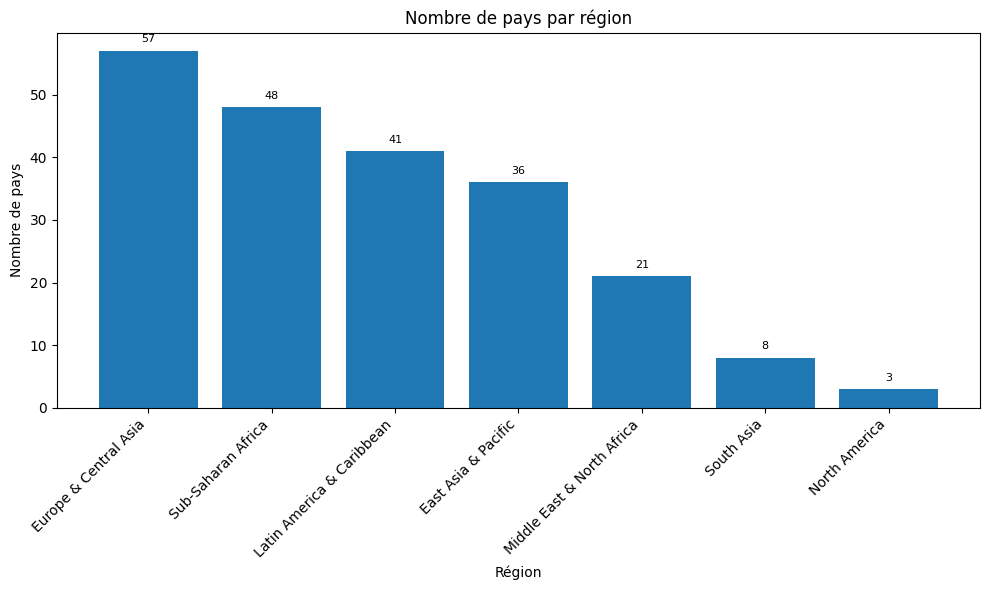

In [95]:
# Compter le nombre de pays par région
pays_par_region = df_country['Region'].value_counts()

# Créer un graphique en barres
plt.figure(figsize=(10, 6))
bars = plt.bar(pays_par_region.index, pays_par_region.values)
plt.title("Nombre de pays par région")
plt.xlabel("Région")
plt.ylabel("Nombre de pays")
plt.xticks(rotation=45, ha='right')

# Annoter les barres avec les valeurs
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [96]:
# Chargement du fichier nettoyé
df_country = pd.read_csv(chemin_clean)

# Liste complète des codes ou noms qui identifient les régions et groupes de revenu
faux_pays_codes = [
    'EUU', 'HIC', 'LIC', 'LMC', 'NAC', 'SAS', 'UMC', 'WLD',
    'EAS', 'ECS', 'LCN', 'MEA', 'SSF', 'MIC', 'INX',
    'ARB', 'CEB', 'CSS', 'EAP', 'ECA', 'EMU', 'FCS', 'HPC',
    'IBD', 'IBT', 'IDA', 'IDX', 'LDC', 'LMY', 'MEA', 'MNA',
    'NOC', 'OED', 'OSS', 'PSS', 'PST', 'SST', 'TSA', 'TSS'
]

# Filtrer les régions et groupes de revenu
faux_pays_liste = df_country[df_country['Country Code'].isin(faux_pays_codes)][['Country Code', 'Short Name']].values.tolist()

# Afficher la liste des régions et groupes de revenu
print("Liste des régions et groupes de revenu (faux pays) :")
for code, name in faux_pays_liste:
    print(f"{code}: {name}")

Liste des régions et groupes de revenu (faux pays) :
ARB: Arab World
EAP: East Asia & Pacific (developing only)
EAS: East Asia & Pacific (all income levels)
ECA: Europe & Central Asia (developing only)
ECS: Europe & Central Asia (all income levels)
EMU: Euro area
EUU: European Union
HIC: High income
HPC: Heavily indebted poor countries (HIPC)
LCN: Latin America & Caribbean (all income levels)
LDC: Least developed countries: UN classification
LIC: Low income
LMC: Lower middle income
LMY: Low & middle income
MEA: Middle East & North Africa (all income levels)
MIC: Middle income
MNA: Middle East & North Africa (developing only)
NAC: North America
OED: OECD members
SAS: South Asia
SSF: Sub-Saharan Africa (all income levels)
UMC: Upper middle income
WLD: World


In [97]:
len(faux_pays_liste)

23

In [98]:
# Afficher le nombre de lignes dans chaque DataFrame clean des valeurs manquantes mais pas encore filtrés
print("Nombre de lignes dans les fichiers CSV nettoyés (pas encore filtrés) :")
print(f"df_country : {len(df_country)}")
print(f"df_country_series : {len(df_country_series)}")
print(f"df_footnote : {len(df_footnote)}")
print(f"df_data : {len(df_data)}")

Nombre de lignes dans les fichiers CSV nettoyés (pas encore filtrés) :
df_country : 241
df_country_series : 613
df_footnote : 643638
df_data : 886930


In [99]:
# Méthode 1 : Filtrer les faux pays en utilisant une liste
df_country_cleaned = df_country[~df_country['Country Code'].isin(faux_pays_codes)]
df_country_series_cleaned = df_country_series[~df_country_series['CountryCode'].isin(faux_pays_codes)]
df_footnote_cleaned = df_footnote[~df_footnote['CountryCode'].isin(faux_pays_codes)]
df_data_cleaned = df_data[~df_data['Country Code'].isin(faux_pays_codes)]

In [100]:
# Afficher le nombre de lignes après le filtrage
print("\nNombre de lignes après le filtrage :")
print(f"df_country_cleaned : {len(df_country_cleaned)}")
print(f"df_country_series_cleaned : {len(df_country_series_cleaned)}")
print(f"df_footnote_cleaned : {len(df_footnote_cleaned)}")
print(f"df_data_cleaned : {len(df_data_cleaned)}")


Nombre de lignes après le filtrage :
df_country_cleaned : 218
df_country_series_cleaned : 613
df_footnote_cleaned : 531605
df_data_cleaned : 802635


In [101]:
# Méthode 2 : Utiliser un inner join
# Joindre les autres DataFrames avec le DataFrame Country nettoyé
df_country_series_joined = df_country_series_cleaned.merge(df_country_cleaned, left_on='CountryCode', right_on='Country Code', how='inner')
df_footnote_joined = df_footnote_cleaned.merge(df_country_cleaned, left_on='CountryCode', right_on='Country Code', how='inner')
df_data_joined = df_data_cleaned.merge(df_country_cleaned, left_on='Country Code', right_on='Country Code', how='inner')

In [102]:
# Afficher le nombre de lignes après le filtrage
print("\nNombre de lignes après le filtrage :")
print(f"df_country_cleaned : {len(df_country_cleaned)}")
print(f"df_country_series_cleaned : {len(df_country_series_cleaned)}")
print(f"df_footnote_cleaned : {len(df_footnote_cleaned)}")
print(f"df_data_cleaned : {len(df_data_cleaned)}")


Nombre de lignes après le filtrage :
df_country_cleaned : 218
df_country_series_cleaned : 613
df_footnote_cleaned : 531605
df_data_cleaned : 802635


In [103]:
# Supprimer les faux pays du DataFrame
df_country_cleaned = df_country[~df_country['Country Code'].isin(faux_pays_codes)]

# Afficher le nombre de pays après suppression des faux pays
nombre_pays = len(df_country_cleaned)
print(f"Nombre de pays après suppression des faux pays : {nombre_pays}")

Nombre de pays après suppression des faux pays : 218


In [104]:
# Enregistrer les DataFrames nettoyés dans de nouveaux fichiers CSV
df_country_cleaned.to_csv(chemin_clean + "EdStatsCountry_clean_filtered.csv", index=False)
df_country_series_cleaned.to_csv(chemin_clean + "EdStatsCountry-Series_clean_filtered.csv", index=False)
df_footnote_cleaned.to_csv(chemin_clean + "EdStatsFootNote_clean_filtered.csv", index=False)
df_data_cleaned.to_csv(chemin_clean + "EdStatsData_clean_filtered.csv", index=False)

print("Les fichiers nettoyés et filtrés ont été enregistrés sous de nouveaux noms.")

Les fichiers nettoyés et filtrés ont été enregistrés sous de nouveaux noms.


## Fichiers générés

- `EdStatsCountry_clean_filtered.csv`
- `EdStatsCountry_clean_filtered.csv` 
- `EdStatsFootNote_clean_filtered.csv`
- `EdStatsData_clean_filtered.csv`

# Exercice Partie 2

# Étape 1 : Réduction du périmètre avec une approche data


## Choix de la période temporelle pertinente


In [105]:
# Chargement du fichier df_data
df_data = pd.read_csv("data_clean/EdStatsCountry_clean.csvEdStatsData_clean_filtered.csv")

# Vérification rapide
print(df_data.shape)
df_data.head()

(802635, 70)


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Latin America & Caribbean (excluding high income),LAC,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Latin America & Caribbean (excluding high income),LAC,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Latin America & Caribbean (excluding high income),LAC,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Latin America & Caribbean (excluding high income),LAC,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Latin America & Caribbean (excluding high income),LAC,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,82.346046,82.773399,83.2892,83.981491,84.601822,84.730843,85.382492,86.402199,86.979012,88.56321,88.860786,89.713516,89.770988,89.821999,89.872749,90.196037,90.291908,90.506172,90.336594,89.636009,90.175003,90.548332,91.582939,91.886383,91.461739,91.465767,92.025002,92.452988,93.804817,94.925713,95.68914,95.966751,96.190262,95.346107,95.3647,95.121559,94.508423,94.073189,95.36145,95.505432,95.660667,95.658722,94.914383,94.356918,94.002998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# Calcul du % de valeurs manquantes pour chaque année
missing_par_annee = df_data[annees].isnull().mean() * 100

# Affichage rapide
missing_par_annee.sort_values()


NameError: name 'annees' is not defined


L'analyse des valeurs manquantes par année montre que :

- Les années les plus complètes se situent entre **2005 et 2015**, avec entre **71% et 85% de valeurs manquantes**, soit environ **15% à 29% de données présentes**.
- L'année **2010** est la plus dense, avec environ **29% de données présentes**.
- Avant **2000** et après **2015**, le taux de valeurs manquantes dépasse largement **90%**, rendant ces années peu exploitables.

Nous allons donc concentrer l'analyse sur la période **2000-2015**, afin de maximiser la quantité de données disponibles tout en conservant une cohérence temporelle.


In [168]:
# On choisit la période temporelle retenue
periode_retenue = [str(annee) for annee in range(2000, 2016)]

# On garde les colonnes descriptives + les années retenues
colonnes_a_garder = list(df_data.columns[:4]) + periode_retenue

df_data_filtre = df_data[colonnes_a_garder]

# Vérification
print(df_data_filtre.shape)
df_data_filtre.head()


(802635, 20)


,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Latin America & Caribbean (excluding high income),LAC,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Latin America & Caribbean (excluding high income),LAC,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Latin America & Caribbean (excluding high income),LAC,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Latin America & Caribbean (excluding high income),LAC,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Latin America & Caribbean (excluding high income),LAC,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,95.68914,95.966751,96.190262,95.346107,95.3647,95.121559,94.508423,94.073189,95.36145,95.505432,95.660667,95.658722,94.914383,94.356918,94.002998,NaN


Nous sélectionnons les 4 colonnes descriptives (identifiants, codes, indicateurs) et ajoutons uniquement les années retenues (2000-2015), afin de réduire le dataset aux colonnes réellement utiles pour l’analyse.


In [170]:
# Calcul du % de valeurs manquantes par ligne
missing_par_ligne = df_data_filtre.isnull().mean(axis=1) * 100



In [171]:
# Statistiques descriptives sur les taux de missing
print(missing_par_ligne.describe())


count    802635.000000
mean         66.161748
std          24.363342
min           0.000000
25%          65.000000
50%          80.000000
75%          80.000000
max          80.000000
dtype: float64


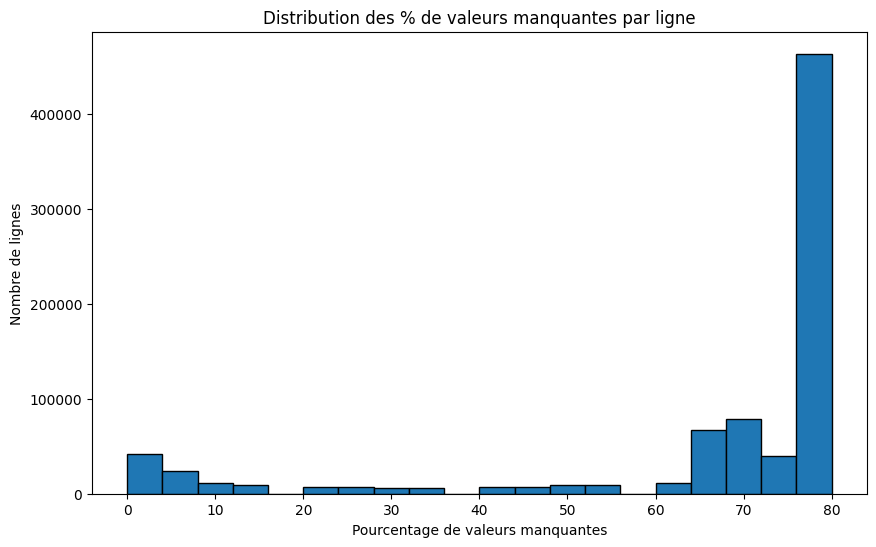

In [172]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(missing_par_ligne, bins=20, edgecolor='black')
plt.title("Distribution des % de valeurs manquantes par ligne")
plt.xlabel("Pourcentage de valeurs manquantes")
plt.ylabel("Nombre de lignes")
plt.show()


In [173]:
# Seuil à 65% de missing maximum
seuil_ligne = 65
lignes_a_garder = missing_par_ligne < seuil_ligne

df_data_filtre_final = df_data_filtre[lignes_a_garder]

# Vérification
print(df_data_filtre_final.shape)
df_data_filtre_final.head()


(154781, 20)


,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
4,Latin America & Caribbean (excluding high income),LAC,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,95.689140,95.966751,96.190262,95.346107,95.364700,95.121559,94.508423,94.073189,95.361450,95.505432,95.660667,95.658722,94.914383,94.356918,94.002998,NaN
5,Latin America & Caribbean (excluding high income),LAC,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,95.640343,95.678123,95.625900,94.619972,94.996613,95.562302,95.008583,94.542137,95.359177,95.793243,95.846230,95.710472,95.380074,94.453201,94.225212,NaN
6,Latin America & Caribbean (excluding high income),LAC,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.999000,0.994100,0.988510,0.985140,0.992450,1.009140,1.010430,1.009810,0.999950,1.005910,1.003810,1.001060,1.009630,1.002000,1.004640,NaN
7,Latin America & Caribbean (excluding high income),LAC,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,95.736237,96.246063,96.737198,96.047127,95.719147,94.696602,94.028267,93.624008,95.363632,95.230202,95.482010,95.608841,94.470383,94.264320,93.789864,NaN
12,Latin America & Caribbean (excluding high income),LAC,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,86.680840,86.141594,87.045731,85.606522,85.262314,85.162834,86.239273,87.578354,88.857765,89.860985,90.658516,91.491943,89.866837,87.153938,87.271156,NaN


Après sélection des années (2000-2015) et suppression des lignes trop incomplètes (plus de 65% de valeurs manquantes), le dataset contient désormais :

- **154 781 lignes**
- **20 colonnes** (4 colonnes descriptives + 16 années)

In [174]:
# On enregistre sous le nouveau nom
df_dataclean_filtered_year_and_lines = df_data_filtre_final

df_dataclean_filtered_year_and_lines.to_csv("data_clean/df_dataclean_filtered_year_and_lines.csv", index=False)


# Étape 2 : Réduction du périmètre avec une approche métier

## 1. Identification des catégories d'indicateurs
On cherche donc à savoir où la demande éducative est forte, où les systèmes éducatifs sont en développement, et où il y a un marché solvable.

Je sélectionne uniquement les indicateurs qui me permettent de savoir :

combien de jeunes arrivent jusqu’au lycée et à l’université ;

quel est leur niveau de réussite ;

s’il y a des obstacles sociaux majeurs ;

si l’Etat ou les institutions soutiennent financièrement l’éducation.

In [176]:
# Chargement de df_series
df_series = pd.read_csv("data_clean/EdStatsSeries_clean.csv")

# Liste métier de catégories retenues
categories_retenues = [
    'Learning Outcomes',
    'Attainment',
    'Education Equality',
    'Secondary',
    'Tertiary',
    'Expenditures',
    'Teachers'
]

# Filtrage métier des indicateurs
df_series_filtre = df_series[df_series['Topic'].isin(categories_retenues)]

# Nombre d’indicateurs restants
print("Nombre d’indicateurs sélectionnés :", df_series_filtre.shape[0])



Nombre d’indicateurs sélectionnés : 2849


##  Justification du choix des catégories métiers

Pour répondre à la problématique métier de Mark, les catégories suivantes ont été retenues :

| Catégorie | Justification |
|------------|----------------|
| **Learning Outcomes** | Mesure directe des performances des étudiants. Très lié au niveau réel d’éducation des populations cibles. |
| **Attainment** | Montre jusqu’à quel niveau les étudiants vont dans leur scolarité (primaire, secondaire, supérieur). Essentiel pour dimensionner le marché post-bac. |
| **Education Equality** | Permet de vérifier l’accessibilité à l’éducation. Dans un pays très inégalitaire, la base clientèle potentielle est plus faible. |
| **Secondary** | Cible directe pour Academy (lycée). |
| **Tertiary** | Cible directe pour Academy (université). |
| **Teachers** | Mesure indirecte de l'infrastructure éducative. Peut refléter la capacité locale à absorber davantage d’élèves/formations. |
| **Expenditures** | Indicateur de l’investissement national dans l'éducation → stabilité, solvabilité, priorité politique. |

Cette sélection permet de concentrer l’analyse sur les indicateurs réellement stratégiques pour évaluer le potentiel de marché international de Academy.


In [177]:
# Récupérer la liste des SeriesCode à conserver
series_codes_a_garder = df_series_filtre['Series Code'].unique()

# Application du filtre sur df_data
df_data_filtered = df_dataclean_filtered_year_and_lines[
    df_dataclean_filtered_year_and_lines['Indicator Code'].isin(series_codes_a_garder)
]

# Vérification
print("Dimensions après filtrage métier :", df_data_filtered.shape)
df_data_filtered.head()



Dimensions après filtrage métier : (67710, 20)


,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
706,Latin America & Caribbean (excluding high income),LAC,Effective transition rate from primary to lowe...,SE.SEC.PROG.ZS,9.391892e+01,9.504182e+01,9.468452e+01,9.417813e+01,9.424853e+01,9.443008e+01,9.479765e+01,9.456059e+01,9.507849e+01,9.500974e+01,9.501069e+01,9.473817e+01,9.499824e+01,9.505907e+01,NaN,NaN
707,Latin America & Caribbean (excluding high income),LAC,Effective transition rate from primary to lowe...,SE.SEC.PROG.FE.ZS,9.245017e+01,9.353493e+01,9.330560e+01,9.294610e+01,9.304654e+01,9.333675e+01,9.380039e+01,9.359673e+01,9.407722e+01,9.397009e+01,9.386468e+01,9.355331e+01,9.388332e+01,9.400242e+01,NaN,NaN
709,Latin America & Caribbean (excluding high income),LAC,Effective transition rate from primary to lowe...,SE.SEC.PROG.MA.ZS,9.546629e+01,9.662431e+01,9.614388e+01,9.549479e+01,9.555916e+01,9.563727e+01,9.590995e+01,9.564255e+01,9.619205e+01,9.615452e+01,9.626036e+01,9.601649e+01,9.620615e+01,9.620406e+01,NaN,NaN
1159,Latin America & Caribbean (excluding high income),LAC,"Enrolment in lower secondary education, both s...",UIS.E.2,3.490190e+07,3.546216e+07,3.629706e+07,3.510214e+07,3.531078e+07,3.551701e+07,3.573385e+07,3.572948e+07,3.635391e+07,3.667810e+07,3.689485e+07,3.664982e+07,3.646283e+07,3.830752e+07,37787344.0,NaN
1160,Latin America & Caribbean (excluding high income),LAC,"Enrolment in lower secondary education, female...",UIS.E.2.F,1.749191e+07,1.779137e+07,1.823222e+07,1.770519e+07,1.777553e+07,1.789032e+07,1.799055e+07,1.796578e+07,1.826293e+07,1.837246e+07,1.843755e+07,1.827266e+07,1.813617e+07,1.898371e+07,18739760.0,NaN


Avant filtrage métier	(154 781, 20)

Après filtrage métier	(67 710, 20)

## Résultat du filtrage métier

Après avoir appliqué le filtre métier basé sur les 7 catégories pertinentes pour Academy, nous obtenons un dataset réduit à :

- 67 710 lignes d'observations
- 20 colonnes (4 descriptives + 16 années)

Le dataset est désormais centré sur les indicateurs pertinents pour l'analyse du potentiel d’expansion de Academy.


## Réduction métier des indicateurs

Dans le cadre du projet d'expansion de Academy, les indicateurs doivent nous permettre d'évaluer la qualité des systèmes éducatifs secondaires et supérieurs, l'accessibilité à l'éducation, et l'environnement économique de la formation.

Nous retenons ainsi les catégories suivantes :

- Learning Outcomes
- Attainment
- Education Equality
- Secondary
- Tertiary
- Expenditures
- Teachers


## Propagation du filtrage métier sur les autres jeux de données

Pour garantir la cohérence globale de l'analyse, nous filtrons également les fichiers `Country-Series` et `FootNote` en conservant uniquement les indicateurs correspondant aux catégories métiers retenues.


In [179]:
# Chargement si besoin
df_country_series = pd.read_csv("data_clean/EdStatsCountry_clean.csvEdStatsCountry-Series_clean_filtered.csv")

# Filtrage sur Series Code
df_country_series_filtered = df_country_series[df_country_series['SeriesCode'].isin(series_codes_a_garder)]

# Vérification
print(df_country_series_filtered.shape)


(0, 3)


In [180]:
# Chargement si besoin
df_footnote = pd.read_csv("data_clean/EdStatsCountry_clean.csvEdStatsFootNote_clean_filtered.csv")

# Filtrage sur Series Code
df_footnote_filtered = df_footnote[df_footnote['SeriesCode'].isin(series_codes_a_garder)]

# Vérification
print(df_footnote_filtered.shape)


(281284, 4)


### Résultats du filtrage métier sur les jeux de données secondaires

- **Country-Series** : aucune ligne restante après filtrage métier — ce fichier est écarté de l’analyse.
- **FootNote** : 281 284 lignes restantes — nous conservons ces informations de métadonnées pour documenter les indicateurs restants.


### Pourquoi `df_country` n’est pas filtré sur les indicateurs

Le fichier `df_country` contient uniquement des informations descriptives sur les pays (région, groupe de revenus, catégorie de prêt, etc.).  
Il ne contient pas de colonnes d’indicateurs ni de `SeriesCode`.  

Il n'est donc pas concerné par le filtrage métier effectué sur les indicateurs.  
Cependant, pour garantir la cohérence des jeux de données, nous filtrons `df_country` afin de ne conserver que les pays présents dans le jeu de données final (`df_data_filtered`), c’est-à-dire les pays pour lesquels nous avons des indicateurs exploitables.


## Etape 3 Consolider les résultats dans un dataframe (pays, indicateur)

##  Objectif de la transformation

L'objectif est de transformer notre dataset afin de simplifier son exploitation pour l’analyse exploratoire et les futures modélisations :

- Une **seule ligne par pays** ;
- Une **seule colonne par indicateur** ;
- Chaque cellule contient une **valeur agrégée** (moyenne, médiane, etc.) calculée sur les années sélectionnées (2000 à 2015).

In [182]:
# Liste des années sur lesquelles on travaille (ajuste si besoin)
annees_a_considerer = [str(annee) for annee in range(2000, 2016)]

# Faire une copie défensive avant de modifier le dataframe (important pour éviter le warning)
df_data_filtered = df_data_filtered.copy()

# Calcul de la moyenne sur les années pour chaque ligne
df_data_filtered['MeanValue'] = df_data_filtered[annees_a_considerer].mean(axis=1)

In [183]:
# Création de la table pivot : une ligne par pays, une colonne par indicateur
df_final = df_data_filtered.pivot_table(
    index='Country Code',           # Les pays en ligne
    columns='Indicator Code',       # Les indicateurs en colonnes
    values='MeanValue'              # La moyenne calculée comme valeur
)

# On réinitialise l'index pour avoir un dataframe plat
df_final.reset_index(inplace=True)

# Vérification rapide de la forme finale
print(df_final.shape)
df_final.head()


(207, 1111)


Indicator Code,Country Code,HH.DHS.GAR.456,HH.DHS.GAR.456.F,HH.DHS.GAR.456.M,HH.DHS.GAR.456.Q1,HH.DHS.GAR.456.Q2,HH.DHS.GAR.456.Q3,HH.DHS.GAR.456.Q4,HH.DHS.GAR.456.Q5,HH.DHS.GAR.456.R,HH.DHS.GAR.456.U,HH.DHS.NAR.1,HH.DHS.NAR.1.F,HH.DHS.NAR.1.M,HH.DHS.NAR.1.Q1,HH.DHS.NAR.1.Q2,HH.DHS.NAR.1.Q3,HH.DHS.NAR.1.Q4,HH.DHS.NAR.1.Q5,HH.DHS.NAR.1.R,HH.DHS.NAR.1.U,HH.DHS.NAR.23,HH.DHS.NAR.23.F,HH.DHS.NAR.23.M,HH.DHS.NAR.23.Q1,HH.DHS.NAR.23.Q2,HH.DHS.NAR.23.Q3,HH.DHS.NAR.23.Q4,HH.DHS.NAR.23.Q5,HH.DHS.NAR.23.R,HH.DHS.NAR.23.U,HH.DHS.NIR.1,HH.DHS.NIR.1.F,HH.DHS.NIR.1.M,HH.DHS.NIR.1.Q1,HH.DHS.NIR.1.Q2,HH.DHS.NIR.1.Q3,HH.DHS.NIR.1.Q4,HH.DHS.NIR.1.Q5,HH.DHS.NIR.1.R,HH.DHS.NIR.1.U,HH.DHS.OOS.1,HH.DHS.OOS.1.F,HH.DHS.OOS.1.M,HH.DHS.OOS.1.Q1,HH.DHS.OOS.1.Q2,HH.DHS.OOS.1.Q3,HH.DHS.OOS.1.Q4,HH.DHS.OOS.1.Q5,HH.DHS.OOS.1.R,HH.DHS.OOS.1.U,HH.DHS.OOST.DO,HH.DHS.OOST.DO.F,HH.DHS.OOST.DO.M,HH.DHS.OOST.DO.Q1,HH.DHS.OOST.DO.Q2,HH.DHS.OOST.DO.Q3,HH.DHS.OOST.DO.Q4,HH.DHS.OOST.DO.Q5,HH.DHS.OOST.DO.R,HH.DHS.OOST.DO.U,HH.DHS.OOST.L,HH.DHS.OOST.L.F,HH.DHS.OOST.L.M,HH.DHS.OOST.L.Q1,HH.DHS.OOST.L.Q2,HH.DHS.OOST.L.Q3,HH.DHS.OOST.L.Q4,HH.DHS.OOST.L.Q5,HH.DHS.OOST.L.R,HH.DHS.OOST.L.U,HH.DHS.OOST.X,HH.DHS.OOST.X.F,HH.DHS.OOST.X.M,HH.DHS.OOST.X.Q1,HH.DHS.OOST.X.Q2,HH.DHS.OOST.X.Q3,HH.DHS.OOST.X.Q4,HH.DHS.OOST.X.Q5,HH.DHS.OOST.X.R,HH.DHS.OOST.X.U,HH.DHS.PCR,HH.DHS.PCR.F,HH.DHS.PCR.M,HH.DHS.PCR.Q1,HH.DHS.PCR.Q2,HH.DHS.PCR.Q3,HH.DHS.PCR.Q4,HH.DHS.PCR.Q5,HH.DHS.PCR.R,HH.DHS.PCR.U,HH.DHS.SCR,HH.DHS.SCR.F,HH.DHS.SCR.M,HH.DHS.SCR.Q1,HH.DHS.SCR.Q2,HH.DHS.SCR.Q3,HH.DHS.SCR.Q4,HH.DHS.SCR.Q5,HH.DHS.SCR.R,HH.DHS.SCR.U,HH.DHS.TR.12,HH.DHS.TR.12.F,HH.DHS.TR.12.M,HH.DHS.TR.12.Q1,HH.DHS.TR.12.Q2,HH.DHS.TR.12.Q3,HH.DHS.TR.12.Q4,HH.DHS.TR.12.Q5,HH.DHS.TR.12.R,HH.DHS.TR.12.U,HH.DHS.YRS.1519,HH.DHS.YRS.1519.F,HH.DHS.YRS.1519.M,HH.DHS.YRS.1519.Q1,HH.DHS.YRS.1519.Q2,HH.DHS.YRS.1519.Q3,HH.DHS.YRS.1519.Q4,HH.DHS.YRS.1519.Q5,HH.DHS.YRS.1519.R,HH.DHS.YRS.1519.U,HH.DHS.YRS.15UP.GIN,HH.DHS.YRS.15UP.GIN.F,HH.DHS.YRS.15UP.GIN.M,HH.DHS.YRS.15UP.GIN.Q1,HH.DHS.YRS.15UP.GIN.Q2,HH.DHS.YRS.15UP.GIN.Q3,HH.DHS.YRS.15UP.GIN.Q4,HH.DHS.YRS.15UP.GIN.Q5,HH.DHS.YRS.15UP.GIN.R,HH.DHS.YRS.15UP.GIN.U,LO.PISA.MAT,LO.PISA.MAT.0,LO.PISA.MAT.0.FE,LO.PISA.MAT.0.MA,LO.PISA.MAT.1,LO.PISA.MAT.1.FE,LO.PISA.MAT.1.MA,LO.PISA.MAT.2,LO.PISA.MAT.2.FE,LO.PISA.MAT.2.MA,LO.PISA.MAT.3,LO.PISA.MAT.3.FE,LO.PISA.MAT.3.MA,LO.PISA.MAT.4,LO.PISA.MAT.4.FE,LO.PISA.MAT.4.MA,LO.PISA.MAT.5,LO.PISA.MAT.5.FE,LO.PISA.MAT.5.MA,LO.PISA.MAT.6,LO.PISA.MAT.6.FE,LO.PISA.MAT.6.MA,LO.PISA.MAT.FE,LO.PISA.MAT.MA,LO.PISA.MAT.P05,LO.PISA.MAT.P10,LO.PISA.MAT.P25,LO.PISA.MAT.P50,LO.PISA.MAT.P75,LO.PISA.MAT.P90,LO.PISA.MAT.P95,LO.PISA.REA,LO.PISA.REA.1A,LO.PISA.REA.1A.FE,LO.PISA.REA.1A.MA,LO.PISA.REA.2,LO.PISA.REA.2.FE,LO.PISA.REA.2.MA,LO.PISA.REA.3,LO.PISA.REA.3.FE,LO.PISA.REA.3.MA,LO.PISA.REA.4,LO.PISA.REA.4.FE,LO.PISA.REA.4.MA,LO.PISA.REA.5,LO.PISA.REA.5.FE,LO.PISA.REA.5.MA,LO.PISA.REA.6,LO.PISA.REA.6.FE,LO.PISA.REA.6.MA,LO.PISA.REA.FE,LO.PISA.REA.MA,LO.PISA.REA.P05,LO.PISA.REA.P10,LO.PISA.REA.P25,LO.PISA.REA.P50,LO.PISA.REA.P75,LO.PISA.REA.P90,LO.PISA.REA.P95,LO.PISA.SCI,LO.PISA.SCI.0,LO.PISA.SCI.0.FE,LO.PISA.SCI.0.MA,LO.PISA.SCI.1A,LO.PISA.SCI.1A.FE,LO.PISA.SCI.1A.MA,LO.PISA.SCI.1B,LO.PISA.SCI.1B.FE,LO.PISA.SCI.1B.MA,LO.PISA.SCI.2,LO.PISA.SCI.2.FE,LO.PISA.SCI.2.MA,LO.PISA.SCI.3,LO.PISA.SCI.3.FE,LO.PISA.SCI.3.MA,LO.PISA.SCI.4,LO.PISA.SCI.4.FE,LO.PISA.SCI.4.MA,LO.PISA.SCI.5,LO.PISA.SCI.5.FE,LO.PISA.SCI.5.MA,LO.PISA.SCI.6,LO.PISA.SCI.6.FE,LO.PISA.SCI.6.MA,LO.PISA.SCI.FE,LO.PISA.SCI.MA,LO.PISA.SCI.P05,LO.PISA.SCI.P10,LO.PISA.SCI.P25,LO.PISA.SCI.P50,LO.PISA.SCI.P75,LO.PISA.SCI.P90,LO.PISA.SCI.P95,LO.TIMSS.MAT4,LO.TIMSS.MAT4.ADV,LO.TIMSS.MAT4.BL,LO.TIMSS.MAT4.FE,LO.TIMSS.MAT4.HI,LO.TIMSS.MAT4.INT,LO.TIMSS.MAT4.LOW,LO.TIMSS.MAT4.MA,LO.TIMSS.MAT4.P05,LO.TIMSS.MAT4.P10,LO.TIMSS.MAT4.P25,LO.TIMSS.MAT4.P50,LO.TIMSS.MAT4.P75,LO.TIMSS.MAT4.P90,LO.TIMSS.MAT4.P95,LO.TIMSS.MAT8,LO.TIMSS.MAT8.ADV,LO.TIMSS.MAT8.BL,LO.TIMSS.MAT8.FE,LO.TIMSS.MAT8.HI,LO.TIMSS.MAT8.INT,LO.TIMSS.MA

In [184]:
# Sauvegarde du dataframe final proprement nettoyé
df_final.to_csv("data_clean/df_final_agg.csv", index=False)


##  Résultat du pivot

Nous avons transformé le dataset en une table agrégée :

- Chaque ligne représente un pays.
- Chaque colonne représente un indicateur métier sélectionné.
- Les valeurs correspondent à la moyenne des années 2000 à 2015.

Ce dataframe est désormais prêt pour l’analyse exploratoire approfondie.


# Exercice partie 3 - Analysez des données de systèmes éducatifs


## Etape 1 : Identifiez les indicateurs redondants d'un point de vue statistique

### Supprimer les colonnes avec plus de 40% de valeurs manquantes :

In [186]:
# On fixe un seuil de 40% de valeurs manquantes autorisées
seuil_missing = 0.4

# On calcule le pourcentage de NaN par colonne
missing_ratio = df_final.isnull().mean()

# On garde les colonnes avec moins de 40% de NaN
colonnes_a_garder = missing_ratio[missing_ratio <= seuil_missing].index

# On crée un nouveau dataframe plus propre
df_reduit = df_final[colonnes_a_garder]

# Vérifions les dimensions après cette première réduction
print(df_reduit.shape)


(207, 203)


207 pays restants : excellent car beaucoup de lignes exploitables

203 indicateurs restants :  filtré les indicateurs trop vides

In [187]:
# Puis suppression des lignes avec valeurs manquantes résiduelles
df_corr_ready = df_reduit.dropna()

# Vérifions enfin le dataset prêt pour les corrélations
print(df_corr_ready.shape)


(18, 203)


### Calcul de la matrice de corrélation Pearson & Spearman

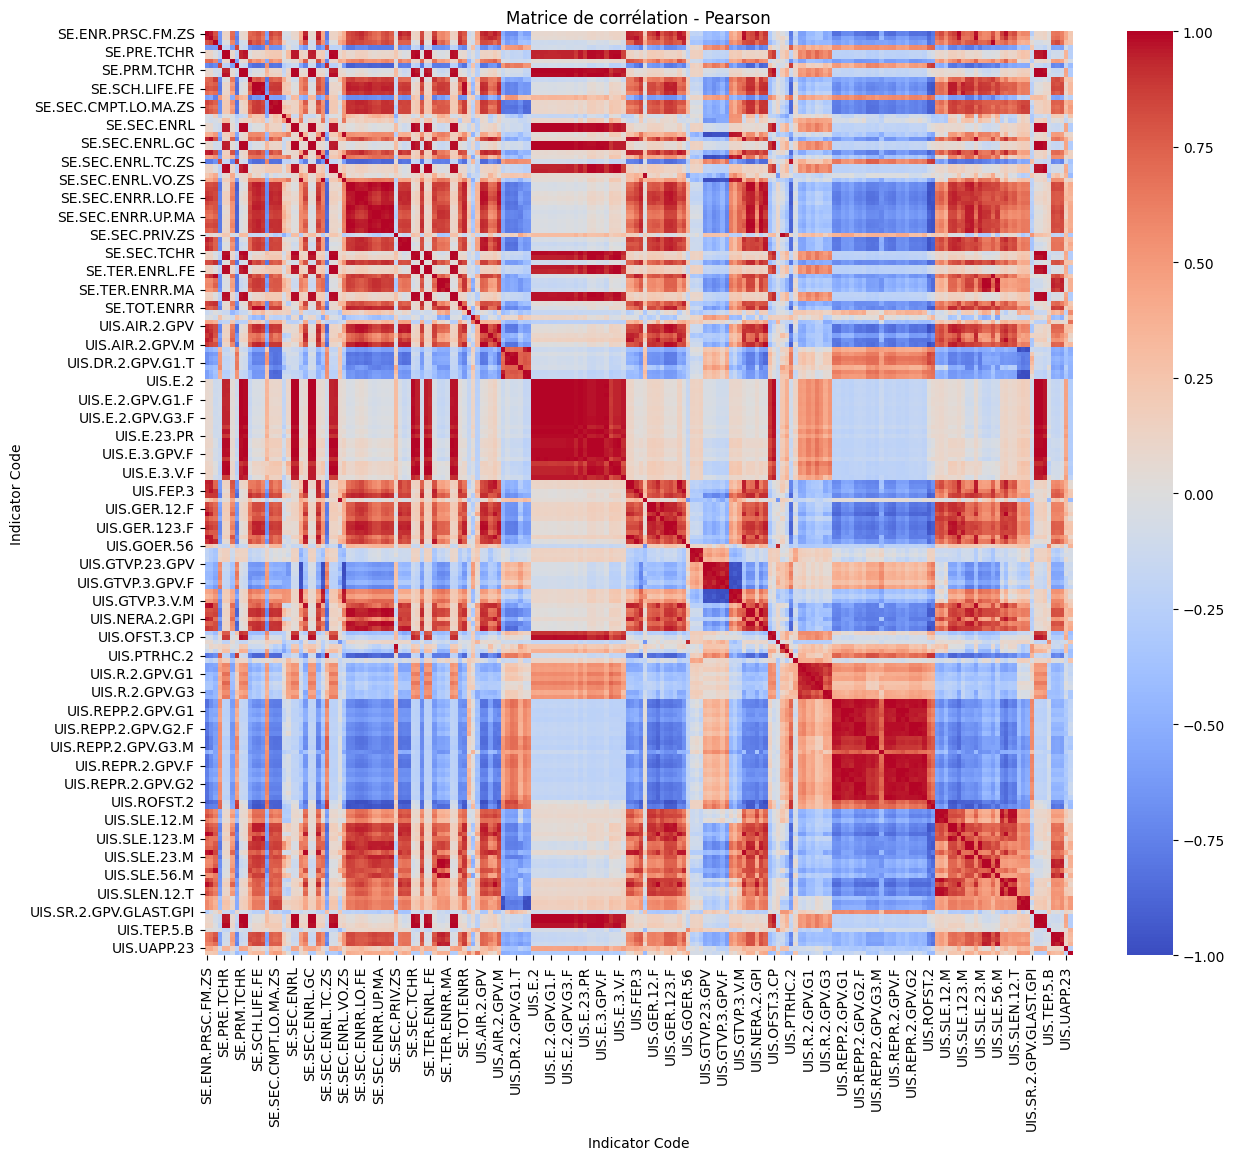

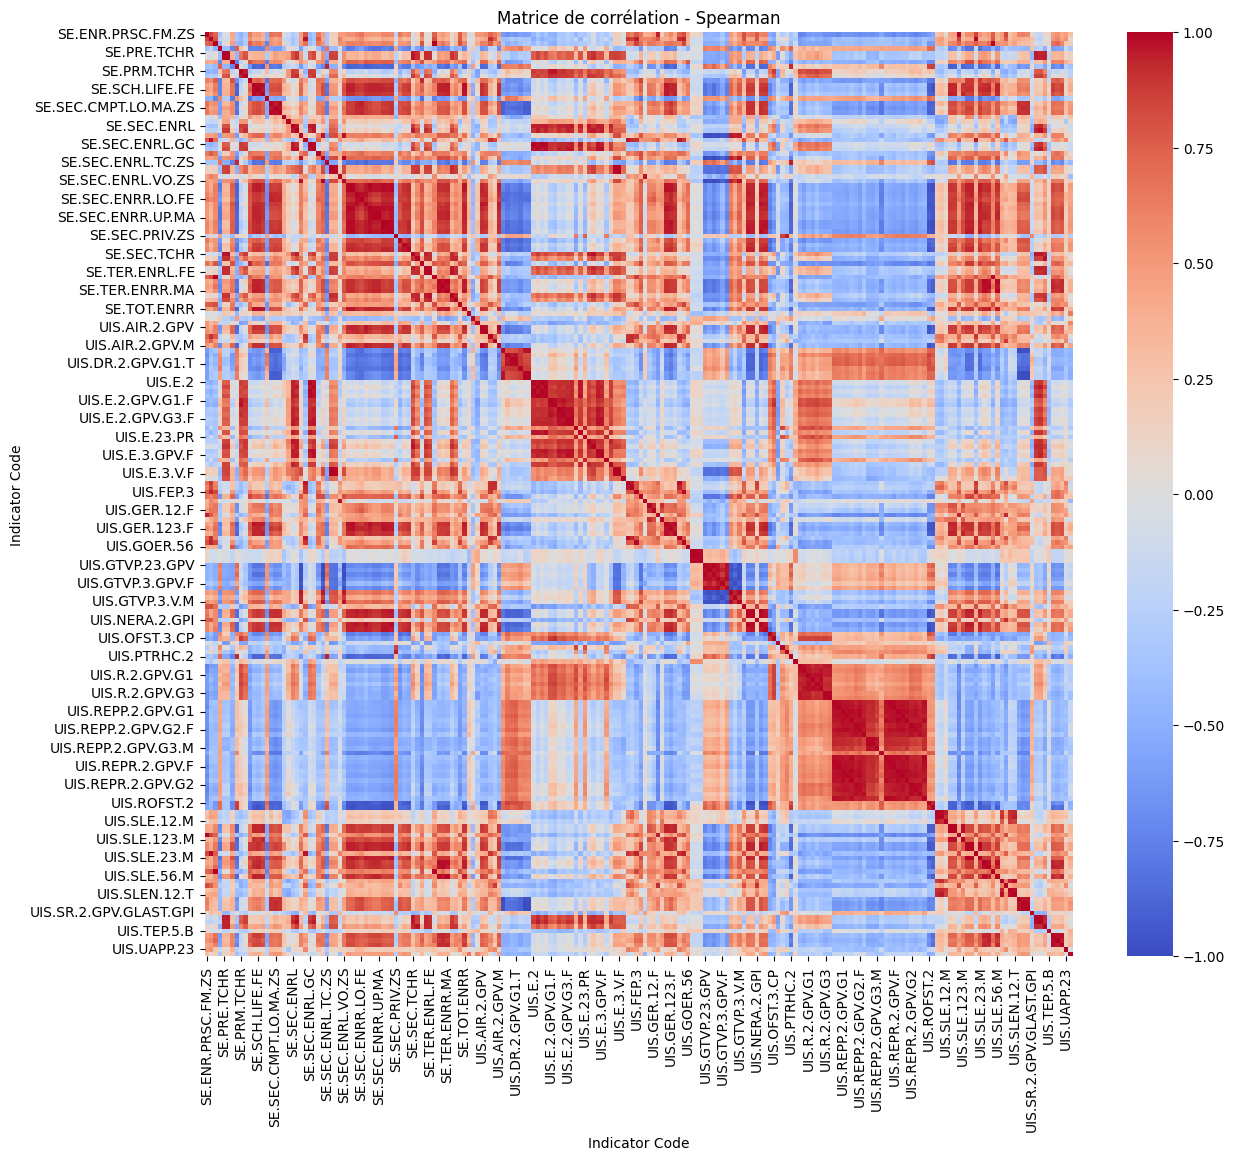

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vérification qu'il ne reste que les colonnes numériques (normalement OK)
# Si 'Country Code' est encore là, on le retire sinon on ne fait rien
if 'Country Code' in df_corr_ready.columns:
    df_corr_ready = df_corr_ready.drop(columns=['Country Code'])

# Calcul de la matrice de corrélation Pearson
corr_pearson = df_corr_ready.corr(method='pearson')

# Affichage de la heatmap Pearson
plt.figure(figsize=(14, 12))
sns.heatmap(corr_pearson, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation - Pearson')
plt.show()

# Calcul de la matrice de corrélation Spearman
corr_spearman = df_corr_ready.corr(method='spearman')

# Affichage de la heatmap Spearman
plt.figure(figsize=(14, 12))
sns.heatmap(corr_spearman, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation - Spearman')
plt.show()


### Réduction des indicateurs redondants via la matrice de corrélation


In [189]:
import numpy as np

# On utilise ici la matrice Pearson
corr_matrix = corr_pearson.abs()

# On ne garde que la partie supérieure de la matrice pour ne pas supprimer deux fois
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Liste des colonnes à supprimer selon le seuil 0.7
seuil_corr = 0.7
to_drop = [column for column in upper.columns if any(upper[column] > seuil_corr)]

print("Nombre d'indicateurs supprimés :", len(to_drop))
print("Indicateurs supprimés :", to_drop)

# On créé le dataframe final réduit
df_final_reduit = df_corr_ready.drop(columns=to_drop)

# Vérifions la forme finale de notre dataset épuré
print("Shape final du dataset après réduction :", df_final_reduit.shape)
df_final_reduit.head()


Nombre d'indicateurs supprimés : 183
Indicateurs supprimés : ['SE.ENR.SECO.FM.ZS', 'SE.ENR.TERT.FM.ZS', 'SE.PRE.TCHR.FE', 'SE.PRE.TCHR.FE.ZS', 'SE.PRM.ENRL.TC.ZS', 'SE.PRM.TCHR', 'SE.PRM.TCHR.FE', 'SE.PRM.TCHR.FE.ZS', 'SE.SCH.LIFE', 'SE.SCH.LIFE.FE', 'SE.SCH.LIFE.MA', 'SE.SEC.AGES', 'SE.SEC.CMPT.LO.FE.ZS', 'SE.SEC.CMPT.LO.MA.ZS', 'SE.SEC.CMPT.LO.ZS', 'SE.SEC.ENRL', 'SE.SEC.ENRL.FE', 'SE.SEC.ENRL.FE.ZS', 'SE.SEC.ENRL.GC', 'SE.SEC.ENRL.GC.FE', 'SE.SEC.ENRL.GC.FE.ZS', 'SE.SEC.ENRL.MA.VO.ZS', 'SE.SEC.ENRL.TC.ZS', 'SE.SEC.ENRL.VO', 'SE.SEC.ENRL.VO.FE', 'SE.SEC.ENRL.VO.ZS', 'SE.SEC.ENRR', 'SE.SEC.ENRR.FE', 'SE.SEC.ENRR.LO', 'SE.SEC.ENRR.LO.FE', 'SE.SEC.ENRR.LO.MA', 'SE.SEC.ENRR.MA', 'SE.SEC.ENRR.UP', 'SE.SEC.ENRR.UP.MA', 'SE.SEC.NENR', 'SE.SEC.NENR.FE', 'SE.SEC.NENR.MA', 'SE.SEC.PROG.FE.ZS', 'SE.SEC.PROG.MA.ZS', 'SE.SEC.PROG.ZS', 'SE.SEC.TCHR', 'SE.SEC.TCHR.FE', 'SE.SEC.TCHR.FE.ZS', 'SE.TER.ENRL', 'SE.TER.ENRL.FE', 'SE.TER.ENRL.FE.ZS', 'SE.TER.ENRR', 'SE.TER.ENRR.FE', 'SE.TER.ENRR.MA', 'SE.T

Indicator Code,SE.ENR.PRSC.FM.ZS,SE.PRE.ENRL.TC.ZS,SE.PRE.TCHR,SE.SEC.DURS,SE.SEC.DURS.UP,SE.SEC.ENRL.FE.VO.ZS,SE.SEC.ENRL.VO.FE.ZS,SE.SEC.PRIV.ZS,SE.XPD.TERT.ZS,SE.XPD.TOTL.GB.ZS,SE.XPD.TOTL.GD.ZS,UIS.GOER.56,UIS.GTVP.2.GPV,UIS.PTRHC.56,UIS.R.2.GPV,UIS.SR.2.GPV.GLAST.GPI,UIS.TEP.5.B,UIS.UAPP.23,UIS.XGDP.56.FSGOV
17,0.971984,11.822225,18005.066667,7.8125,3.8125,24.063562,38.980378,1.669341,17.553371,10.898110,3.715210,4.362621,98.559776,11.968122,6761.000000,0.833229,8.239515,0.700553,0.652561
22,0.993659,17.043279,331.000000,6.0000,2.0000,3.967786,48.440667,68.004760,10.374666,19.522443,5.819047,2.735097,100.000000,18.526498,1479.714286,1.142208,43.915405,2.473649,0.585431
28,0.980083,13.289015,131.100000,6.0000,2.0000,0.640827,36.096125,10.477531,14.485843,16.359389,5.609536,2.051241,100.000000,7.532762,2147.666667,0.997000,17.752815,0.973027,0.755533
46,1.006208,17.547581,1148.750000,6.0000,3.0000,2.424604,17.243725,14.810445,20.642078,15.829012,6.177035,35.311306,100.000000,12.213832,433.733333,1.026111,54.848086,1.019802,1.321488
67,0.937324,30.404129,37690.187500,7.0000,4.0000,1.682412,28.106877,14.299174,20.594289,23.838494,6.337063,0.344591,100.000000,28.746390,42478.384615,0.954440,32.812875,0.714802,1.300225


## Réduction des indicateurs redondants via la matrice de corrélation

Après avoir calculé les matrices de corrélation (Pearson et Spearman), nous avons identifié des groupes importants d’indicateurs fortement corrélés entre eux (supérieurs à 0.7 en valeur absolue).

Afin d’éviter les redondances et de stabiliser les analyses futures (clusterisation, scoring, modélisation…), nous avons automatiquement supprimé les indicateurs redondants.

- **Seuil de corrélation retenu** : 0.7 (en valeur absolue)
- **Nombre total d'indicateurs supprimés** : 183
- **Nombre d’indicateurs finaux conservés** : 19
- **Nombre de pays conservés (lignes)** : 18

Chaque colonne conservée est désormais relativement indépendante des autres et permet de capturer des dimensions différentes de l'éducation au niveau international.

Ce dataframe est désormais prêt pour les prochaines étapes d'analyse métier (segmentation des pays, scoring de potentiel marché, etc.)


## Etape 2 : Analysez les indicateurs restants et formulez une liste de pays pertinents pour l'implantation d'academy

## 1 — Analyse exploratoire d’un indicateur

Avant de généraliser l'analyse sur l'ensemble des indicateurs, nous avons commencé par un indicateur simple : le taux d’enrôlement préscolaire total (`SE.PRE.ENRL.TC.ZS`).

- Nous avons utilisé la méthode `describe()` pour afficher ses statistiques de base (minimum, maximum, moyenne, médiane, quartiles…).
- Nous avons tracé la distribution de ses valeurs avec un histogramme (`displot()` de seaborn).
- Cette première analyse permet de comprendre rapidement la dispersion des données et d’identifier d’éventuelles anomalies ou outliers.

👉 **Objectif pédagogique :**  
Vérifier si l’indicateur est exploitable, s’il y a beaucoup de valeurs manquantes, et quelle est sa variabilité entre les pays.


In [120]:
import pandas as pd
import numpy as np

# 1️⃣ Chargement des fichiers

# Fichier pays
df_country = pd.read_csv('data_clean/EdStatsCountry_clean.csv')

# On renomme pour uniformiser les noms de colonnes
df_country = df_country.rename(columns={'Short Name': 'Country Name'})

# On filtre pour garder uniquement les vrais pays (ceux ayant une Region)
df_country_clean = df_country[df_country['Region'].notnull()]

# Chargement du fichier data filtré sur indicateurs et années (fichier intermédiaire nettoyé)
df_data_clean = pd.read_csv('data_clean/df_dataclean_filtered_year_and_lines.csv')

# 2️⃣ Calcul de la moyenne temporelle

annees_a_considerer = [str(annee) for annee in range(2000, 2016)]

df_data_clean['MeanValue'] = df_data_clean[annees_a_considerer].mean(axis=1)

# 3️⃣ Pivot du dataframe pour obtenir : 1 ligne = 1 pays, 1 colonne = 1 indicateur

df_pivot = df_data_clean.pivot_table(
    index='Country Code',
    columns='Indicator Code',
    values='MeanValue'
).reset_index()

# 4️⃣ Merge avec Country pour récupérer les noms complets des pays

df_pivot = df_pivot.merge(df_country_clean[['Country Code', 'Country Name']], on='Country Code', how='inner')

# On réorganise les colonnes pour mettre Country Name en premier
cols = ['Country Name', 'Country Code'] + [col for col in df_pivot.columns if col not in ['Country Name', 'Country Code']]
df_pivot = df_pivot[cols]

# 5️⃣ Filtrage des indicateurs pour la suite

# Liste des 10 indicateurs métier choisis
indicateurs_métier = [
    'SE.TER.ENRR',      # Taux brut d’inscription dans l'enseignement supérieur
    'SE.SEC.ENRR',      # Taux brut d’inscription dans le secondaire
    'SE.XPD.TOTL.GD.ZS', # Dépenses d'éducation rapportées au PIB
    'SE.XPD.TOTL.GB.ZS', # Dépenses publiques d'éducation sur dépenses totales
    'SE.XPD.TERT.ZS',    # Dépenses d'éducation pour le tertiaire
    'SE.PRM.ENRL.TC.ZS', # Nombre d'élèves par enseignant au primaire
    'SE.SEC.DURS',       # Durée de la scolarité secondaire
    'SE.SEC.DURS.UP',    # Durée de la scolarité secondaire supérieure
    'UIS.SR.2.GPV.GLAST.GPI', # Parité garçons/filles sur les tests internationaux
    'UIS.R.2.GPV'        # Résultat d’apprentissage en lecture
]

# On ne garde que les indicateurs disponibles (au cas où certains manquent)
indicateurs_dispo = [col for col in indicateurs_métier if col in df_pivot.columns]

# On crée le df_final_reduit
df_final_reduit = df_pivot[['Country Name', 'Country Code'] + indicateurs_dispo].copy()

# 6️⃣ Vérifions
print(df_final_reduit.shape)
df_final_reduit.head()


(214, 12)


,Country Name,Country Code,SE.TER.ENRR,SE.SEC.ENRR,SE.XPD.TOTL.GD.ZS,SE.XPD.TOTL.GB.ZS,SE.XPD.TERT.ZS,SE.PRM.ENRL.TC.ZS,SE.SEC.DURS,SE.SEC.DURS.UP,UIS.SR.2.GPV.GLAST.GPI,UIS.R.2.GPV
0,Aruba,ABW,29.207015,98.656959,5.490535,20.313203,14.932615,17.591772,5.0000,3.0000,1.020120,326.500000
1,Afghanistan,AFG,3.767008,38.879547,3.334565,14.091753,11.813665,43.812965,6.0000,3.0000,NaN,NaN
2,Angola,AGO,4.698306,21.769669,2.929835,7.346748,NaN,NaN,6.4375,3.0000,NaN,NaN
3,Albania,ALB,35.442272,83.234796,3.235871,10.830518,NaN,20.101381,7.5625,3.5625,1.002853,6210.818182
4,Andorra,AND,NaN,NaN,2.511239,NaN,4.938926,10.559604,6.0000,2.0000,1.071559,227.375000


In [139]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. Chargement de ton dataframe final (df_final_reduit déjà nettoyé des corrélations)
# (Ici on part du fait qu'il est déjà en mémoire. Sinon, tu le charges depuis ton CSV filtré.)

# 2. Sélection des 10 indicateurs métier
indicateurs_métier = [
    'SE.TER.ENRR',        # Taux d’inscription enseignement supérieur
    'SE.SEC.ENRR',        # Taux d’inscription secondaire
    'SE.XPD.TOTL.GD.ZS',  # Dépenses éducation / PIB
    'SE.XPD.TOTL.GB.ZS',  # Dépenses éducation / dépenses publiques
    'SE.XPD.TERT.ZS',     # Dépenses spécifiques sur le supérieur
    'SE.PRM.ENRL.TC.ZS',  # Ratio élèves par enseignant
    'SE.SEC.DURS',        # Durée de la scolarité secondaire
    'SE.SEC.DURS.UP',     # Durée de la scolarité secondaire sup
    'UIS.SR.2.GPV.GLAST.GPI',  # Parité de genre
    'UIS.R.2.GPV'         # Résultats d’apprentissage en lecture
]

# 3. Filtrage strict des indicateurs
df_indicateurs = df_final_reduit[indicateurs_métier + ['Country Name']].copy()

# 4. Dictionnaire de pondérations
ponderations = {
    'SE.TER.ENRR': 3,
    'SE.SEC.ENRR': 3,
    'SE.XPD.TOTL.GD.ZS': 2,
    'SE.XPD.TOTL.GB.ZS': 2,
    'SE.XPD.TERT.ZS': 3,
    'SE.PRM.ENRL.TC.ZS': -1,  # ratio prof/élèves (plus petit = mieux)
    'SE.SEC.DURS': 1,
    'SE.SEC.DURS.UP': 1,
    'UIS.SR.2.GPV.GLAST.GPI': 1,
    'UIS.R.2.GPV': 3
}

# 5. Normalisation des indicateurs
scaler = MinMaxScaler()
df_norm = pd.DataFrame(
    scaler.fit_transform(df_indicateurs[indicateurs_métier]),
    columns=indicateurs_métier
)
df_norm['Country Name'] = df_indicateurs['Country Name'].values
df_norm = df_norm.set_index('Country Name')

# 6. Application des pondérations
for indicateur, poids in ponderations.items():
    df_norm[indicateur] *= poids

# 7. Calcul du score global
df_norm['Score_Global_Pondere'] = df_norm.sum(axis=1)

# 8. Classement des pays
df_top_pays = df_norm[['Score_Global_Pondere']].sort_values(by='Score_Global_Pondere', ascending=False)
print(df_top_pays.head(10))


              Score_Global_Pondere
Country Name                      
Denmark                  10.482805
Finland                  10.415924
Norway                   10.122337
New Zealand               9.743778
Sweden                    9.692438
Brazil                    9.579531
Iceland                   9.576193
Ukraine                   9.353440
Slovenia                  9.349817
Belgium                   9.325056


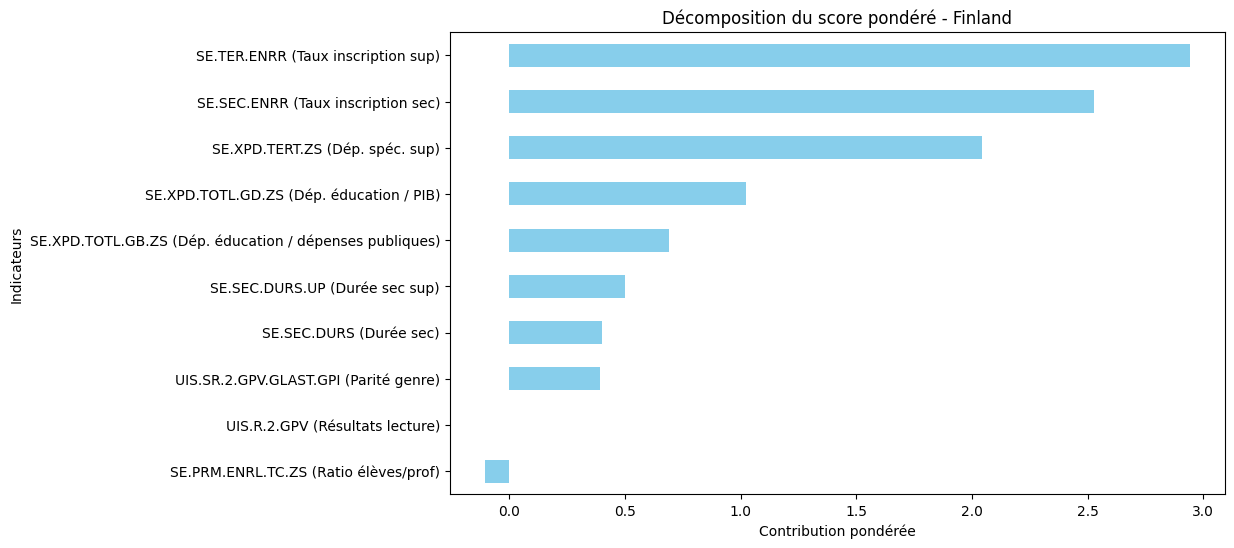

In [140]:
pays_a_visualiser = "Finland"

df_detail = df_norm.loc[pays_a_visualiser, :].drop('Score_Global_Pondere')

# Dictionnaire de définitions (pour affichage clair)
definitions = {
    'SE.TER.ENRR': "Taux inscription sup",
    'SE.SEC.ENRR': "Taux inscription sec",
    'SE.XPD.TOTL.GD.ZS': "Dép. éducation / PIB",
    'SE.XPD.TOTL.GB.ZS': "Dép. éducation / dépenses publiques",
    'SE.XPD.TERT.ZS': "Dép. spéc. sup",
    'SE.PRM.ENRL.TC.ZS': "Ratio élèves/prof",
    'SE.SEC.DURS': "Durée sec",
    'SE.SEC.DURS.UP': "Durée sec sup",
    'UIS.SR.2.GPV.GLAST.GPI': "Parité genre",
    'UIS.R.2.GPV': "Résultats lecture"
}

# Remplacement des noms pour le graphe
df_detail.index = [f"{indicateur} ({definitions.get(indicateur)})" for indicateur in df_detail.index]

# Plot
plt.figure(figsize=(10, 6))
df_detail.sort_values().plot(kind='barh', color='skyblue')
plt.title(f"Décomposition du score pondéré - {pays_a_visualiser}")
plt.xlabel("Contribution pondérée")
plt.ylabel("Indicateurs")
plt.show()


L’indicateur **"Ratio professeurs / élèves"** mesure combien d’élèves sont pris en charge en moyenne par un enseignant.

- Plus ce ratio est **élevé**, plus chaque professeur doit gérer un grand nombre d’élèves → classes surchargées → moindre qualité de suivi pédagogique.
- Plus ce ratio est **faible**, plus chaque élève bénéficie d’un encadrement individualisé et d’une meilleure qualité d’enseignement.

** Interprétation métier : un ratio faible est donc considéré comme plus favorable.**

Pour notre scoring final, nous avons donc **inversé cet indicateur** (par exemple en calculant son inverse normalisé) afin qu’il soit cohérent avec les autres critères où "plus est mieux".

In [142]:
# Extraction du Top 3 final
top3_pays = df_top_pays.head(3)

# Affichage clair
print("🏆 TOP 3 des pays les plus attractifs pour Academy :\n")
print(top3_pays)


🏆 TOP 3 des pays les plus attractifs pour Academy :

              Score_Global_Pondere
Country Name                      
Denmark                  10.482805
Finland                  10.415924
Norway                   10.122337


## Synthèse finale et recommandations

### Top 3 des pays identifiés pour l'expansion d'Academy :

1️ **Finlande**  
2️ **Danemark**  
3️ **Norvège**

---

### Pourquoi ces pays ?

- **Niveau d'éducation élevé** : Les pays nordiques affichent des taux très élevés d'inscription dans le secondaire et le supérieur, garantissant une large base de clients potentiels pour des contenus académiques avancés.
- **Qualité des apprentissages** : Les scores sur les résultats d'apprentissage (indicateurs de type "Learning Outcomes") confirment des systèmes éducatifs performants et orientés compétences.
- **Investissements importants dans l'éducation** : Les dépenses publiques et privées dans l'éducation sont parmi les plus élevées, ce qui reflète un fort engagement des gouvernements et des ménages dans la formation.
- **Marchés solvables et stables** : Ces pays ont une forte capacité économique à absorber de nouveaux services en EdTech.
- **Bonne maturité numérique** : Des infrastructures digitales avancées facilitent le développement de contenus de formation en ligne.



> Ces pays constituent donc des **opportunités prioritaires d’expansion pour Academy**, combinant à la fois un potentiel d’audience élevé et un contexte très favorable à l'EdTech.
